# Data Augmentation

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing import image

Using TensorFlow backend.


In [3]:
batch_size = 32
img_size = 299
train_path = '../data/sports/train/'
test_path = '../data/sports/test/'

You may need to download the data first.

- Open a terminal
- `cd data/sports/`
- `python download_sport.py`


## Data augmentation

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=5,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

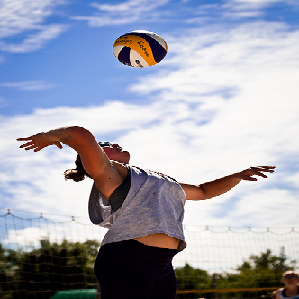

In [6]:
input_path = train_path + 'Beach volleyball/1e9ce0e76695de2e5d1f6964ab8c538.jpg'

img = image.load_img(input_path, target_size=(img_size, img_size))
img

In [7]:
img_array = image.img_to_array(img)

In [8]:
img_tensor = np.expand_dims(img_array, axis=0)

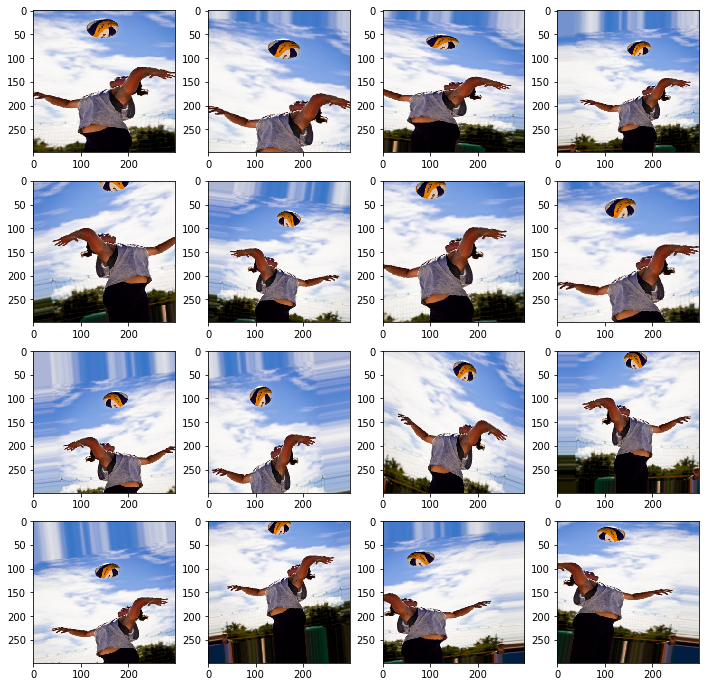

In [9]:
plt.figure(figsize=(12, 12))

i = 0
for im in datagen.flow(img_tensor, batch_size=1):
    i += 1
    if i > 16:
        break
    plt.subplot(4, 4, i)
    plt.imshow(im[0])

## Exercise 1

`datagen` also has a method called `flow_from_directory`. Use it to produce a batch of 32 images of sports flowing from the training directory.

In [10]:
# TODO:
# datagen.flow_from_directory()

## Convolutional model

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


## Exercise 2

Define a training and test data generators and use them to train the model using the `model.fit_generator` function.

The training data generator should apply data augmentation while the test data generator should not modify the images except for rescaling them.

In [13]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 2100 images belonging to 3 classes.


In [14]:
# TODO: get this working, maybe problem with images
model.fit_generator(
        train_generator)

Epoch 1/1
34/66 [==============>...............] - ETA: 27s - loss: 1.5339 - acc: 0.3925

StopIteration: image file is truncated (21 bytes not processed)